# 필요한 모듈 설정

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib import patches
%matplotlib inline

# 데이터 로드

In [16]:
wine = pd.read_csv('WineQT.csv')
wine.drop(["Id"],axis=1, inplace=True) # 필요없는 'Id' column 제거
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


## 데이터 크기, 결측치 확인

In [17]:
wine.shape

(1143, 12)

In [18]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

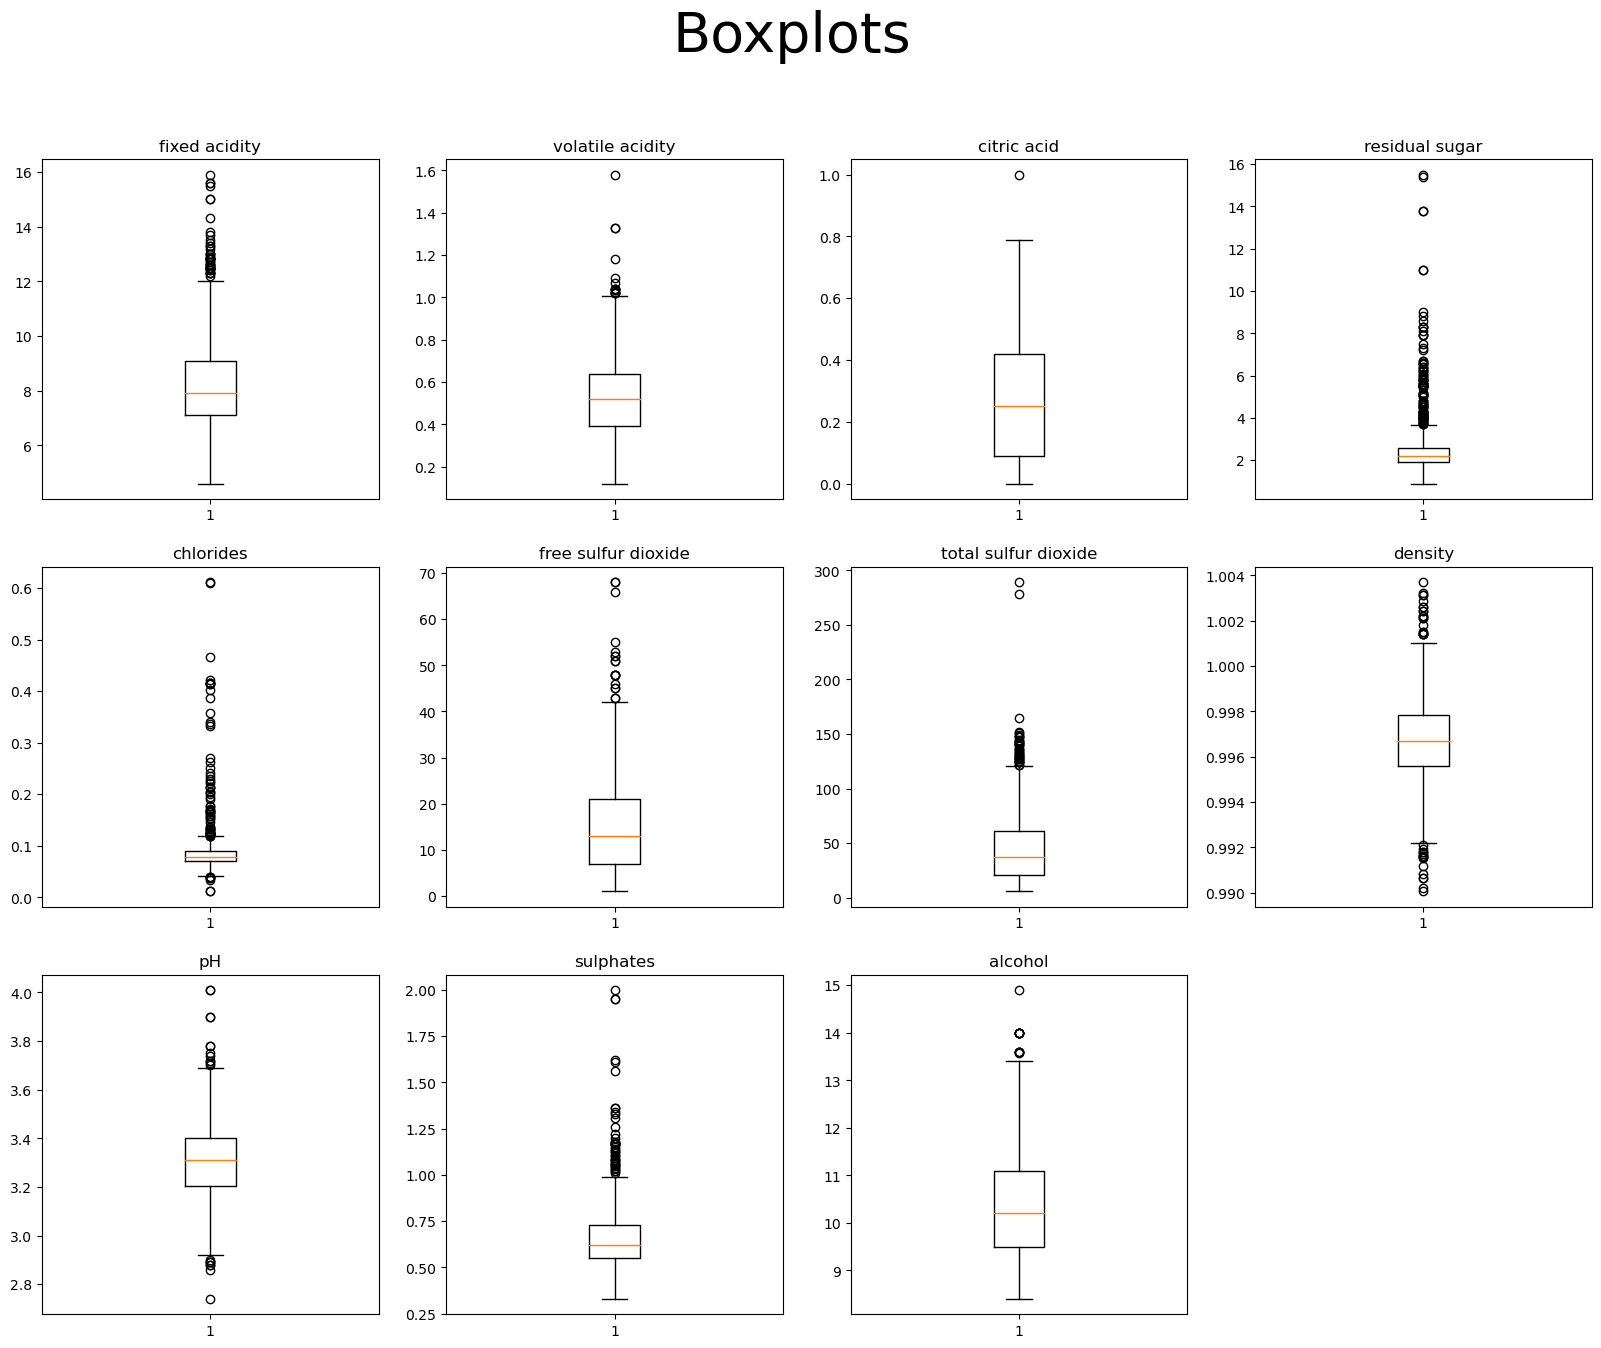

In [19]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = wine.columns[:11]

for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(wine[cols[i]])
plt.show()

# Modeling 

## Scaled, Normalization

In [20]:
from sklearn import preprocessing
from imblearn.over_sampling import SMOTE 

oversample = SMOTE()
features, labels =  oversample.fit_resample(wine.drop(["quality"],axis=1), wine["quality"])
scaler = preprocessing.MinMaxScaler()
scaled_data = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
scaled_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247788,0.397260,0.000000,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
1,0.283186,0.520548,0.000000,0.116438,0.143573,0.358209,0.215548,0.494126,0.362205,0.209581,0.215385
2,0.283186,0.438356,0.040000,0.095890,0.133556,0.208955,0.169611,0.508811,0.409449,0.191617,0.215385
3,0.584071,0.109589,0.560000,0.068493,0.105175,0.238806,0.190813,0.582232,0.330709,0.149701,0.215385
4,0.247788,0.397260,0.000000,0.068493,0.106845,0.149254,0.098940,0.567548,0.606299,0.137725,0.153846
...,...,...,...,...,...,...,...,...,...,...,...
2893,0.585166,0.139276,0.607923,0.081730,0.101058,0.118438,0.076557,0.545265,0.185879,0.274238,0.281071
2894,0.262416,0.235271,0.325656,0.093214,0.090880,0.154433,0.059144,0.250603,0.373500,0.244986,0.590667
2895,0.506980,0.138470,0.455775,0.357925,0.101475,0.059701,0.025500,0.550744,0.381280,0.286065,0.628386
2896,0.403555,0.190493,0.501128,0.063705,0.098435,0.088430,0.035336,0.341192,0.368302,0.214668,0.622090


In [21]:
normalized_arr = preprocessing.normalize(scaled_data)
normalized_data = pd.DataFrame(normalized_arr, columns=features.columns)
normalized_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.247821,0.397313,0.000000,0.068502,0.106859,0.149274,0.098953,0.567623,0.606380,0.137743,0.153867
1,0.279605,0.513966,0.000000,0.114966,0.141757,0.353679,0.212822,0.487878,0.357625,0.206931,0.212661
2,0.301354,0.466480,0.042566,0.102042,0.142124,0.222361,0.180493,0.541454,0.435718,0.203910,0.229203
3,0.513628,0.096372,0.492461,0.060232,0.092491,0.210005,0.167800,0.512011,0.290823,0.131646,0.189408
4,0.247821,0.397313,0.000000,0.068502,0.106859,0.149274,0.098953,0.567623,0.606380,0.137743,0.153867
...,...,...,...,...,...,...,...,...,...,...,...
2893,0.522503,0.124361,0.542823,0.072978,0.090236,0.105755,0.068359,0.486874,0.165974,0.244871,0.250972
2894,0.278823,0.249982,0.346017,0.099042,0.096562,0.164089,0.062842,0.266272,0.396853,0.260303,0.627598
2895,0.406960,0.111152,0.365857,0.287312,0.081455,0.047923,0.020469,0.442090,0.306059,0.229629,0.504414
2896,0.374978,0.177004,0.465642,0.059193,0.091464,0.082168,0.032833,0.317031,0.342221,0.199467,0.578038


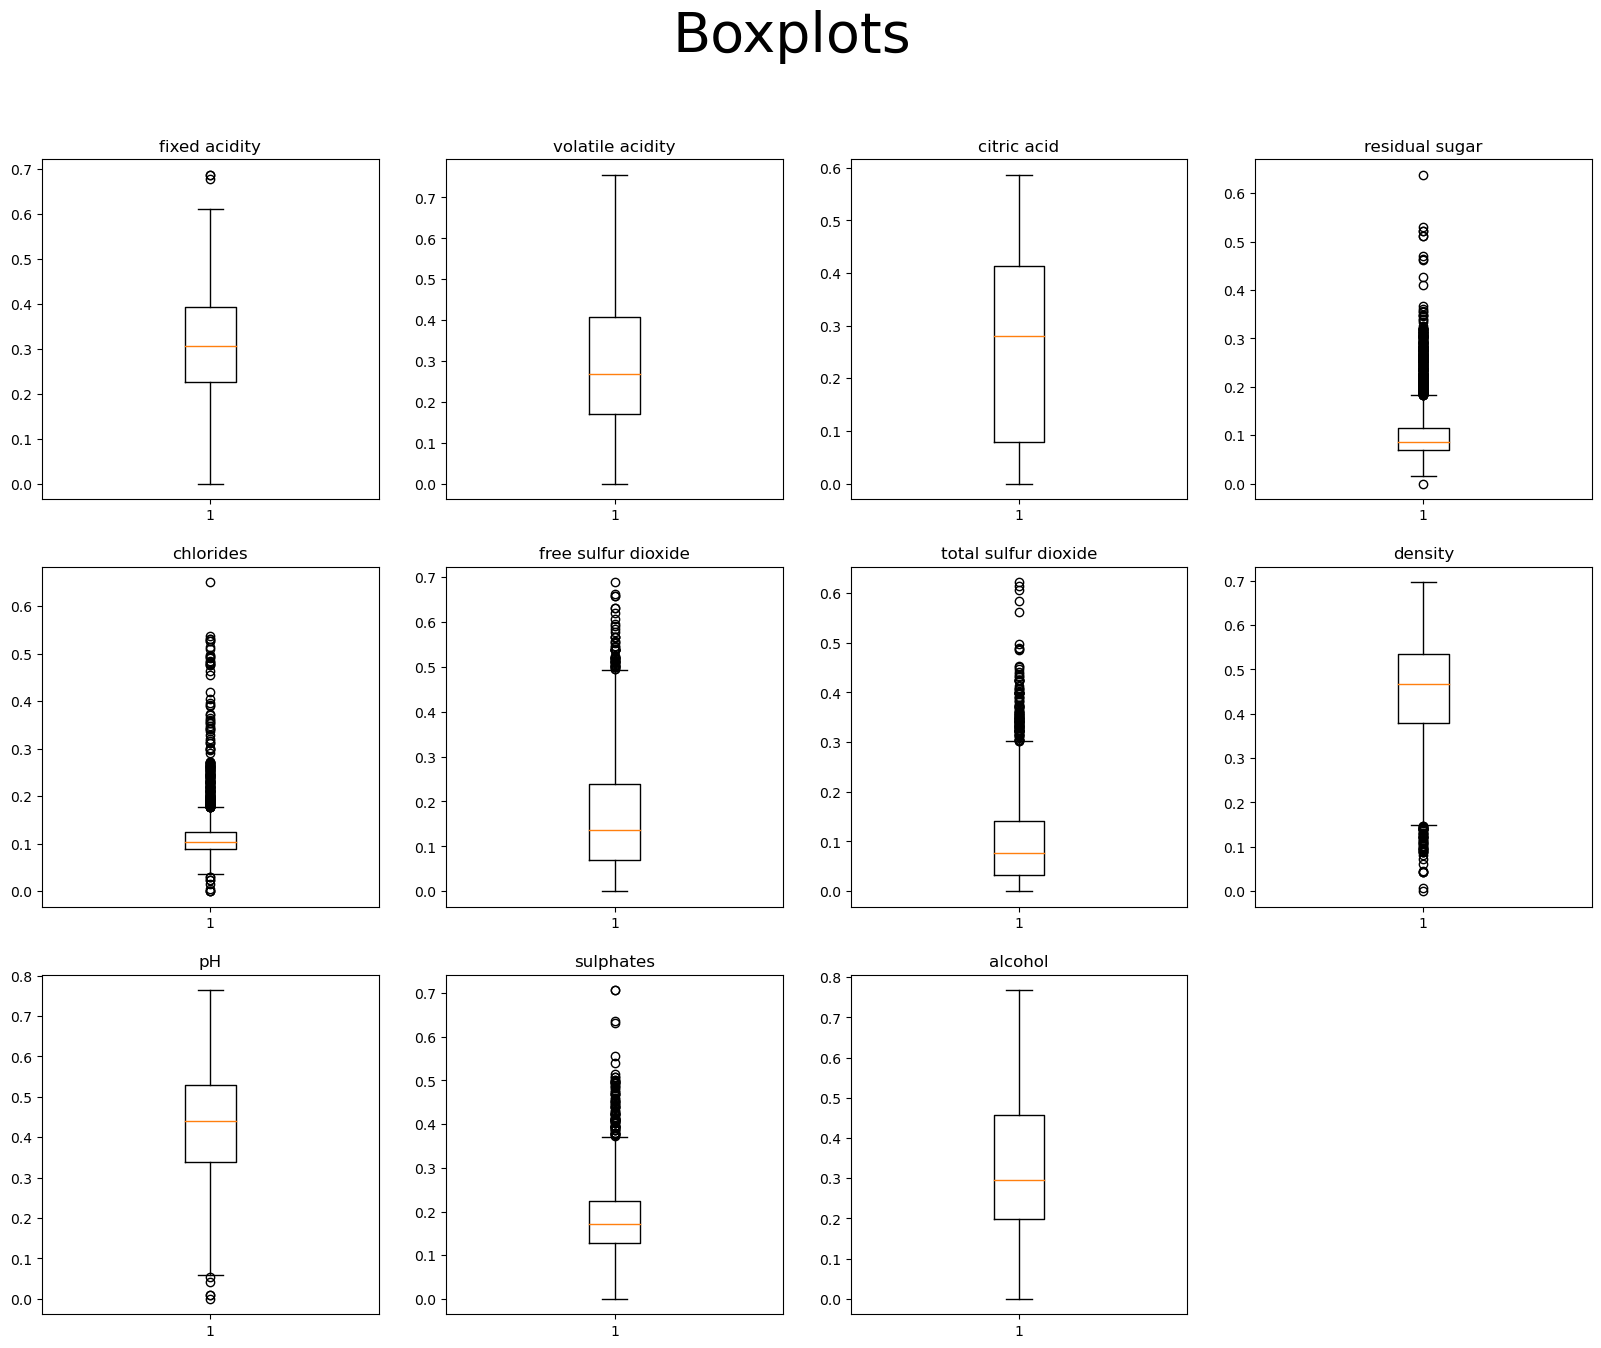

In [22]:
plt.figure(figsize=(20,15))
plt.suptitle("Boxplots", fontsize=40)
cols = normalized_data.columns

for i in range(len(cols)):
    plt.subplot(3,4,i+1)
    plt.title(cols[i])
    plt.boxplot(normalized_data[cols[i]])
plt.show()

In [ ]:
from numpy import log
import warnings
warnings.filterwarnings(action='ignore')
unskew_data = normalized_data.copy(deep=True)

## train / test split

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(unskew_data, labels, test_size=0.2, random_state=42)

## Classifier Models

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn import metrics

In [ ]:
rnd_clf = RandomForestClassifier(random_state=42)
log_clf = LogisticRegression(random_state=42)
dt_clf = DecisionTreeClassifier(random_state=42)
kn_clf = KNeighborsClassifier()
svm_clf = SVC(random_state=42)

models = [rnd_clf, dt_clf, kn_clf, svm_clf, log_clf]

## fit

In [ ]:
for m in models:
    m.fit(X_train, y_train)

## predict

In [ ]:
accuracy = []
precision = []
recall = []
F1 = []

for m in models:
    y_pred = m.predict(X_test)
    print(m.__class__.__name__,'Acc: ', accuracy_score(y_test,y_pred))
    print(m.__class__.__name__,'Precision: ', precision_score(y_test,y_pred, average = "macro"))
    print(m.__class__.__name__,'Recall: ', recall_score(y_test,y_pred, average = "macro"))
    print(m.__class__.__name__,'F1: ', f1_score(y_test,y_pred, average = "macro"))
    
    print("")
    
    acc = accuracy_score(y_test,y_pred)
    pcs = precision_score(y_test,y_pred, average = "macro")
    rec = recall_score(y_test,y_pred, average = "macro")
    f1 = f1_score(y_test,y_pred, average = "macro")
    
    accuracy.append(acc)
    precision.append(pcs)
    recall.append(rec)
    F1.append(f1)
    
    print("")

# Metrics Score

In [ ]:
import math

metrics = [accuracy, precision, recall , F1]
total = []

for i in range(5):
    avg = 0
    for mt in metrics:
        avg += mt[i]*0.25
    avg = round(avg,2)*100
    avg = math.trunc(avg)
    total.append(avg)
        
print(total)